In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from causal_nh.utils import open_pkl_file

%matplotlib inline

In [3]:
dataset_name = 'synth_3_events'

In [4]:
# path = f'../../data/NeuralHawkesData/data_bookorder/fold1/'
path = f'../../data/data_{dataset_name}/'

In [5]:
train = open_pkl_file(path + 'train.pkl', 'train')
dev = open_pkl_file(path + 'dev.pkl', 'dev')

In [6]:
from causal_nh.train_cuda import train_nh, train_causal_nh
from causal_nh.model.NeuralHawkesCuda import CausalNeuralHawkesMasked, CausalNeuralHawkesMaskedWeighted, CausalNeuralHawkesTrainableWeighted

In [7]:
train_nh(train, dev, '../../artefacts/', False, lr=0.01, num_epochs=20, batch_size=10)

Processing data...
You are using GPU acceleration.
Number of GPU:  6
start training...
Epoch 0, process 0 out of 9 is done
Epoch 0, process 1 out of 9 is done
Epoch 0, process 2 out of 9 is done
Epoch 0, process 3 out of 9 is done
Epoch 0, process 4 out of 9 is done


KeyboardInterrupt: 

In [8]:
import pickle

In [9]:
with open(path + 'A.pkl', 'rb') as f:
    A = pickle.load(f)

In [10]:
A = A['A']
W = A
A[A==0.2] = 1


In [11]:
A

array([[1., 1., 0.],
       [1., 1., 0.],
       [0., 0., 1.]])

Processing data...
You are using GPU acceleration.
Number of GPU:  6
start training...
The log-likelihood at epoch 0: -1.151657172126847

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


Parameter containing:
tensor([[1.0200, 0.9889, 0.0000],
        [1.0200, 0.9894, 0.0000],
        [0.0000, 0.0000, 0.9971]], device='cuda:0', requires_grad=True)
tensor([[1., 1., 0.],
        [1., 1., 0.],
        [0., 0., 1.]], device='cuda:0')


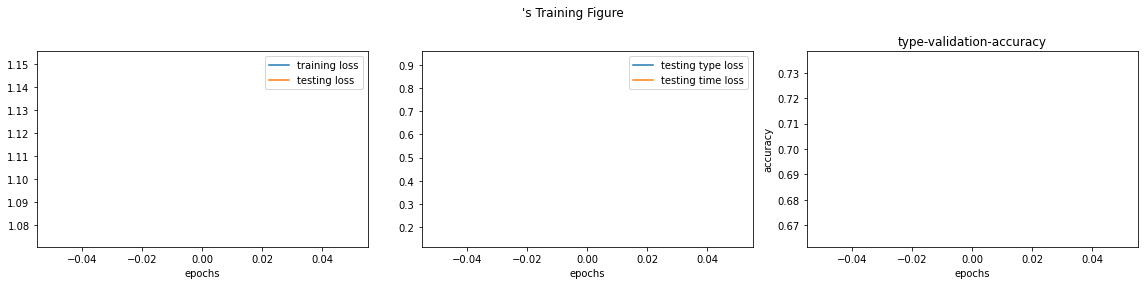

Saving training loss and validation data...
If you have a trained model before this, please combine the previous train_date file to generate plots that are able to show the whole training information


In [12]:
save_path, model_path = train_causal_nh(train, dev, A,W,  '../../artefacts/', False, lr=0.01, num_epochs=1, batch_size=50, dataset_name=dataset_name, model=CausalNeuralHawkesTrainableWeighted)

In [13]:
print((save_path, model_path))

('../../artefacts/2021_12_15_58_10_synth_3_events_CausalNeuralHawkesTrainableWeighted', '../../artefacts/2021_12_15_58_10_synth_3_events_CausalNeuralHawkesTrainableWeighted_model.pt')
